# Приоретизация гипотез и анализ A/B теста для принятия бизнес решений  по увеличению выручки крупного интернет-магазина.

**Контекст**
<br> Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

**Цель проекта**
- Выбрать наиболее эфективные гипотезы для проверки и проанализировать результаты A/B теста для принятия решений в бизнесе.

**Задачи проекта** 
<br>*Часть 1. Приоритизация гипотез*
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.
<br>*Часть 2. Анализ A/B-теста*
<br>Проанализируйте A/B-тест:
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**Описание данных** 
- *Файл /datasets/hypothesis.csv.*
<br>Hypothesis — краткое описание гипотезы;
<br>Reach — охват пользователей по 10-балльной шкале;
<br>Impact — влияние на пользователей по 10-балльной шкале;
<br>Confidence — уверенность в гипотезе по 10-балльной шкале;
<br>Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
- *Файл /datasets/orders.csv.*
<br>transactionId — идентификатор заказа;
<br>visitorId — идентификатор пользователя, совершившего заказ;
<br>date — дата, когда был совершён заказ;
<br>revenue — выручка заказа;
<br>group — группа A/B-теста, в которую попал заказ.
- *Файл /datasets/visitors.csv.*
<br>date — дата;
<br>group — группа A/B-теста;
<br>visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

### Обработка данных

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
import scipy.stats as stats
from scipy import stats as st
import math
import os
pd.options.display.max_colwidth = 100

In [2]:
data1 = '/datasets/hypothesis.csv'
data2 = 'D:\import\hypothesis.csv'

if os.path.exists(data1):
    data = pd.read_csv(data1)
elif os.path.exists(data2):
    data = pd.read_csv(data2)
else:
    print('Something is wrong')

In [3]:
display(data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
data.duplicated().sum()

0

- Явных дубликатов и пропущенных значений в данных нет. 
- Названия столбцов приведем к нижнему регистру.

In [6]:
data.columns.to_list()

['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts']

In [7]:
data.columns = data.columns.str.lower()

- Данные готовы для анализа

### Фреймворк ICE для приоритизации гипотез.

In [8]:
data['ICE'] = round(((data['impact'] * data['confidence']) / data['efforts']),2)
print(data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                                                                            hypothesis  \
8                                              Запустить акцию, дающую скидку на товар в день рождения   
0   Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7     Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...   
1                            Запустить собственную службу доставки, что сократит срок доставки заказов   
5             Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
4                     Изменить цвет фона главн

- Наиболее перспективными по ICE оказались гипотезы: 9, 1 ,8, 7, 3.

### Фреймворк RICE для приоритизации гипотез.

In [9]:
data['RICE'] = (data['impact'] * data['confidence'] * data['reach']) / data['efforts']
print(data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                                                                            hypothesis  \
7     Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...   
0   Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...   
8                                              Запустить акцию, дающую скидку на товар в день рождения   
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                            Запустить собственную службу доставки, что сократит срок доставки заказов   
5             Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
4                     Изменить цвет фона главн

- Похожим образом выглядит набор наиболее перспективных гипотез по RICE: 8, 3, 1, 7, 9.

### Почему приоритизация гипотез изменилась при применении RICE вместо ICE. 

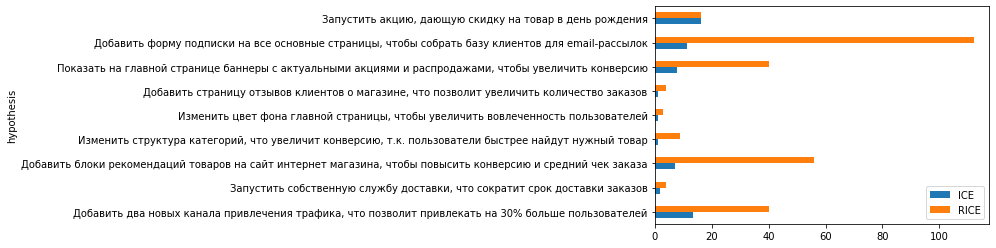

In [10]:
data.set_index('hypothesis')[['ICE','RICE']].plot(kind='barh');

In [11]:
ice_rice = pd.DataFrame([[9, 8],
                         [1, 3],
                         [8, 1],
                         [7, 7],
                         [3, 9]], 
columns=['приоритезация ICE',' приоритезация RICE'])
display(ice_rice)

,приоритезация ICE,приоритезация RICE
0,9,8
1,1,3
2,8,1
3,7,7
4,3,9


В топ 5 приоритетных гипотез по RICE и ICE вошли одинаковые гипотезы, но в разной последовательности. С чем это связано? С тем, что в приоритете RICE учитывается показатель reach. У 9ой гипотезы этот показатель равен 1, а вот у 8ой гипотезы он равен 10, поэтому очередность наших ТОП 5 гиротез изменилась.

## Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

### Обработка данных

In [12]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [13]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [15]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [16]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [18]:
orders['date'] = orders['date'].map(lambda x :dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x :dt.datetime.strptime(x, '%Y-%m-%d'))

In [19]:
display(visitors.duplicated().sum())
display(orders.duplicated().sum())

0

0

- Явных дубликатов и пропусков в данных нет.
- Изменили тип данных в колонкак с датой.
- Переименовали столбцы.

In [20]:
display(visitors['group'].unique()) 
display(orders['group'].unique())

array(['A', 'B'], dtype=object)

array(['B', 'A'], dtype=object)

In [21]:
print('Дата начала теста: ',orders['date'].min()) 
print('Дата окончания теста: ',orders['date'].max())

Дата начала теста:  2019-08-01 00:00:00
Дата окончания теста:  2019-08-31 00:00:00


- У нас 2 группы пользователей - A и В

In [22]:
duplicates_users = orders.groupby('visitor_id').agg({'group':['nunique']})
duplicates_users.columns = ['group']
duplicates_users = duplicates_users.query('group > 1')
print('Пользователи попавшие в обе группы: ', len(duplicates_users))

Пользователи попавшие в обе группы:  58


- Мы нашли 58 уникальных пользователе, которые попали в обе группы.
- Предлагаю удалить этих пользователей, так как их действия сложно тнтерпретировать в рамках групп А и В.

In [23]:
orders = orders.query('visitor_id not in @ duplicates_users')

In [24]:
visitors = visitors.query('visitors not in @ duplicates_users')

### График кумулятивной выручки по группам.

In [25]:
dates_groups = orders[['date', 'group']].drop_duplicates() # создаем массив уникальных пар значений дат и групп теста

In [26]:
orders_agregated = dates_groups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date':'max', 'group': 'max', 'transaction_id':'nunique', 'visitor_id':'nunique', 'revenue':'sum'}), axis=1).sort_values(by=['date', 'group'])
orders_agregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


- Этот код работает так, будто мы ежедневно считали результаты тестирования до выбранного дня включительно и сохраняли их в строках таблицы orders_aggregated
- Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:

In [27]:
visitors_agregated = dates_groups.apply(
    lambda x:visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1).sort_values(by=['date', 'group'])
visitors_agregated.head() 

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [28]:
cumulative_data = pd.merge(orders_agregated, visitors_agregated, on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data.head() # Объединим обе таблицы в одну с понятными названиями столбцов

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


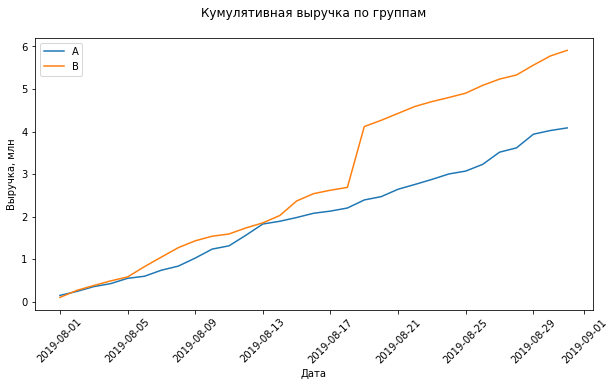

In [29]:
cumulative_data_A = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_B = cumulative_data[cumulative_data['group'] == 'B']
plt.figure(figsize=(10,5))
plt.title('Кумулятивная выручка по группам\n')
plt.xlabel('Дата')
plt.ylabel('Выручка, млн')
plt.xticks(rotation=45)
plt.plot(cumulative_data_A['date'], cumulative_data_A['revenue']/1000000, label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['revenue']/1000000, label='B')
plt.legend();

Из графика видно, что выручка почти равномерно увеличивается в течение всего теста. Хороший знак.
<br> Однако график выручки группы В резко растрет в августе. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке, то есть о выбросах.

### График кумулятивного среднего чека по группам.

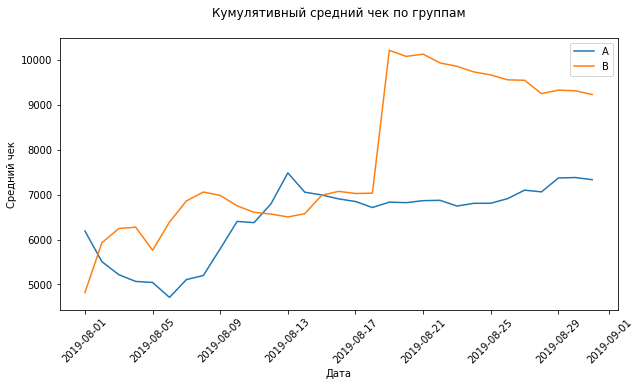

In [30]:
plt.figure(figsize=(10,5))
plt.title('Кумулятивный средний чек по группам\n')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.xticks(rotation=45)
plt.plot(cumulative_data_A['date'], cumulative_data_A['revenue']/cumulative_data_A['orders'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['revenue']/cumulative_data_B['orders'], label='B')
plt.legend();

Здесь так же видим резкий скачок графика группы В в августе. Возможно, в группу B в первой середине теста попали крупные заказы.
<br> Средний чек становится равномерным во второй половине теста: установился для группы A и продолжает падать для группы B.

### График относительного изменения кумулятивного среднего чека группы B к группе A.

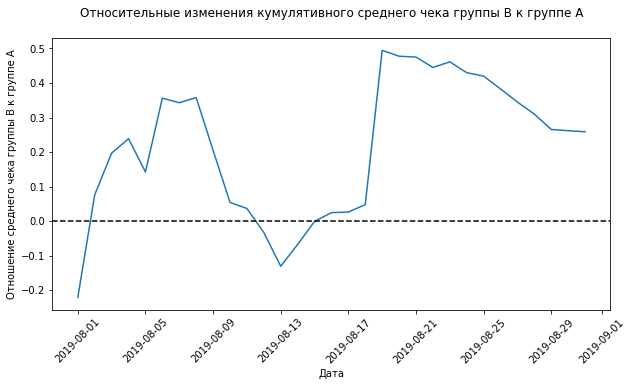

In [31]:
merge_cumulative_data = pd.merge(cumulative_data_A, cumulative_data_B, on='date', how='left', suffixes = ['A', 'B'])
plt.figure(figsize=(10,5))
plt.title('Относительные изменения кумулятивного среднего чека группы B к группе A\n')
plt.xlabel('Дата')
plt.ylabel('Отношение среднего чека группы B к группе A')
plt.xticks(rotation=45)
plt.plot(merge_cumulative_data['date'], (merge_cumulative_data['revenueB']/merge_cumulative_data['ordersB'])/(merge_cumulative_data['revenueA']/merge_cumulative_data['ordersA']) - 1);
plt.axhline(y=0, color='black', linestyle='--');

В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы! Найдём их позже.

### График кумулятивного среднего количества заказов на посетителя по группам.

In [32]:
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

In [33]:
conversion_data_A = cumulative_data[cumulative_data['group'] == 'A']
conversion_data_B = cumulative_data[cumulative_data['group'] == 'B']

In [34]:
x_min = cumulative_data['date'].min()

In [35]:
x_max = cumulative_data['date'].max()

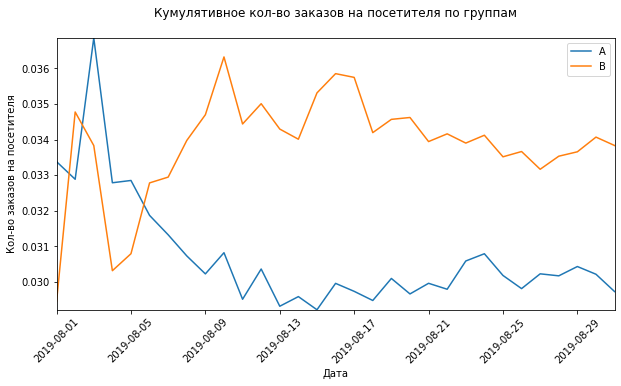

In [36]:
plt.figure(figsize=(10,5))
plt.title('Кумулятивное кол-во заказов на посетителя по группам\n')
plt.xlabel('Дата')
plt.ylabel('Кол-во заказов на посетителя')
plt.xticks(rotation=45)
plt.plot(conversion_data_A['date'], conversion_data_A['conversion'], label='A')
plt.plot(conversion_data_B['date'], conversion_data_B['conversion'], label='B')
plt.legend();
plt.axis([x_min, x_max, 0.029217, 0.036856]); #[xmin, xmax, ymin, ymax]

Благодаря данному графику видим, что количество заказов на посетителя в группах А и В колебались около одного значения в начале теста, а затем данная метрика группы В значительно вырвалась вперёд, а группы A сильно просела.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

In [37]:
merge_conversion_data = pd.merge(conversion_data_A, conversion_data_B, on=['date'], suffixes=['A', 'B'])

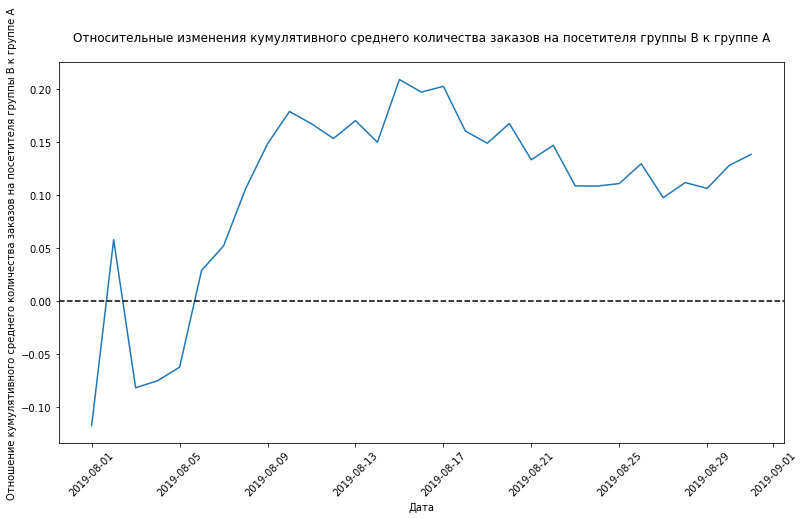

In [38]:
plt.figure(figsize=(13,7))
plt.title('Относительные изменения кумулятивного среднего количества заказов на посетителя группы B к группе A\n')
plt.xlabel('Дата')
plt.ylabel('Отношение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xticks(rotation=45)
plt.plot(merge_conversion_data['date'], (merge_conversion_data['conversionB']/(merge_conversion_data['conversionA']) - 1));
plt.axhline(y=0, color='black', linestyle='--');

- Из данного графика можем сделать вывод, что в начале нашего теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом относительное изменение кумулятивного среднего количества заказов на посетителя группы В снова переживала небольшую стагнацию, но теперь постепенно растёт.
- На данном этапе тестирования рано делать какие-либо выводы, так как отношение кумулятивных метрик групп А и В еще не установилось. Сперва стоит разобраться с аномалиями в августе, которые мы выявили по ходу нашего анализа.

### Точечный график количества заказов по пользователям.

In [39]:
orders_by_users = (
    orders.drop(['date', 'revenue', 'group'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id':pd.Series.nunique})
)

In [40]:
orders_by_users.columns = ['user_id', 'orders']

In [41]:
orders_by_users.sort_values(by='orders', ascending=False).head(10)

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


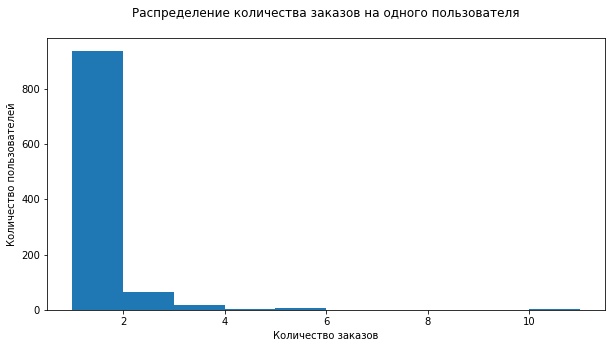

In [42]:
plt.figure(figsize=(10,5))
plt.ylabel('Количество пользователей')
plt.xlabel('Количество заказов')
plt.title('Распределение количества заказов на одного пользователя\n')
plt.hist(orders_by_users['orders']);
plt.show()

Большинство пользователей совершают всего 1 заказ. Небольшое кол-во пользователей соверили заказ 2 раза.
<br> Однако не ясно, сколько пользователей сделало больше 2х заказов. Построим точечную диаграмму.

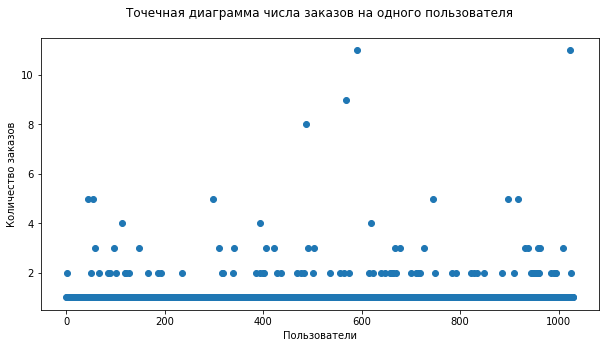

In [43]:
x_values = pd.Series(range(0,len(orders_by_users)))
plt.figure(figsize=(10,5))
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')
plt.title('Точечная диаграмма числа заказов на одного пользователя\n')
plt.scatter(x_values, orders_by_users['orders']);

- Здесь гораздо лучше видно, что пользователей заказавших, более 2х раз совсем мало. Они вполне могут быть аномальными. 
- Для того, что бы понять 2 заказа - это нормально или много, посчитаем перцентили.

### 95-й и 99-й перцентили количества заказов на пользователя.

In [44]:
np.percentile(orders_by_users['orders'], [95,99])

array([2., 4.])

- Не более 5% пользователей совершили больше 2 заказов. И не более 1% пользователей - больше 4 заказов.
- Исходя из полученных данных можем сделать вывод, что нижней границей числа заков будет - 2 заказа.

### Точечный график стоимостей заказов.

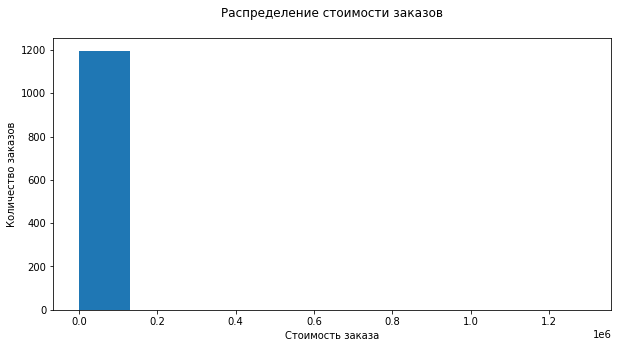

In [45]:
plt.figure(figsize=(10,5))
plt.ylabel('Количество заказов')
plt.xlabel('Стоимость заказа')
plt.title('Распределение стоимости заказов\n')
plt.hist(orders['revenue']);

- Исходя из гистограммы видим, что сумма большинства заказов меньше 200 000 рублей. 
- Однако по гистограмме сложно судить о более дорогих заказах, как и о распределении более дешёвых.
- Более того, распределение стоимости заказов - не нормальное.
- Построим точесную диаграмму.

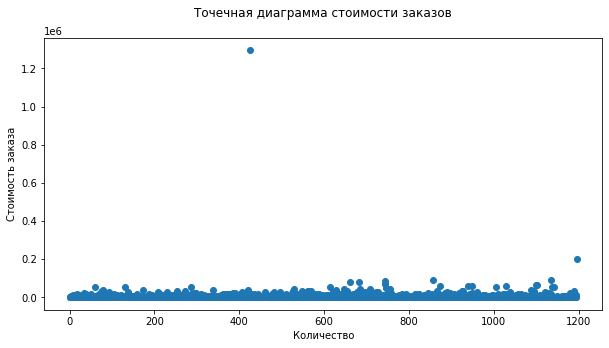

In [46]:
x_values = pd.Series(range(0,len(orders)))
plt.figure(figsize=(10,5))
plt.ylabel('Стоимость заказа')
plt.xlabel('Количество')
plt.title('Точечная диаграмма стоимости заказов\n')
plt.scatter(x_values, orders['revenue']);

Как видно, на фоне двух достаточно крупных заказов остальные, менее аномальные заказы, сбились в одну кучу на оси Х. 
Построим такой же график, но без двух крупных покупок, чтобы исследовать распределение менее аномальных покупок.

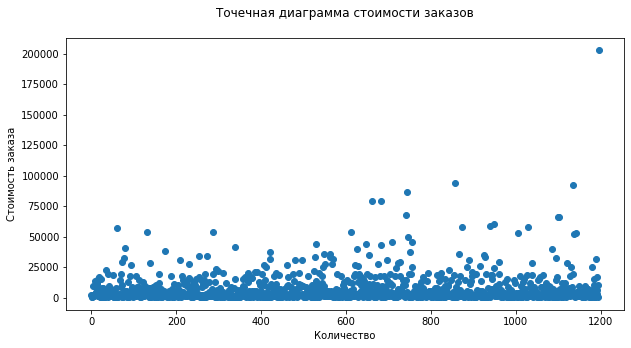

In [47]:
orders1 = orders.query('revenue < 250000')
x_values = pd.Series(range(0,len(orders1)))
plt.figure(figsize=(10,5))
plt.ylabel('Стоимость заказа')
plt.xlabel('Количество')
plt.title('Точечная диаграмма стоимости заказов\n')
plt.scatter(x_values, orders1['revenue']);

- Заказов тоимостью 200 000 всего 1, так же видим 1 заказ свыше 1 200 000 рублей. Оба выглядят очень аномально.
- Найдем выборочные перцентили.

###  95-й и 99-й перцентили стоимости заказов. 

In [48]:
np.percentile(orders['revenue'], [95,99])

array([28000. , 58233.2])

- Не более, чем у 5% заказов чек дороже 28 000 рублей.
- И не более, чем у 1% заказов - дороже 58 233 рублей. 
- Теперь мы точно понимаем, что предполагаемые ранее аномалии, действительно ими являются. 
- За нижнюю границу стоимости заказов примем - 28 000 рублей.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

- Посчитаем статистическую значимость различий в среднем числе заказов на пользователя между группами по «сырым» данным — без удаления аномальных пользователей.
- Сформулируем гипотезы.
- Начнём с подготовки данных.

- Используем тест Манна-Уитни, так как в данных есть большие (по сравнению с нормальным распределением) выбросы, поэтому алгебраические метрики будут работать плохо. Да, они учитывают все значения. Но в этом также их слабое место: одно выбивающееся значение существенно влияет на результат.

- Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['user_id', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [49]:
orders_by_users_A = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_A.columns = ['user_id', 'orders']

orders_by_users_B = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_B.columns = ['user_id', 'orders'] 

- Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [50]:
sampleA = pd.concat([orders_by_users_A['orders'],pd.Series(0, index=np.arange(cumulative_data_A['visitors'].sum() - len(orders_by_users_A['orders'])), name='orders')],axis=0)

sampleB = pd.concat([orders_by_users_B['orders'],pd.Series(0, index=np.arange(cumulative_data_B['visitors'].sum() - len(orders_by_users_B['orders'])), name='orders')],axis=0) 

**Сформулируем гипотезы:**
<br> **H₀** - статистически значимых различий в среденм кол-ве заказов по «сырым» данным между группами нет.  
<br> **H₁** - статистически значимые различия в среденм кол-ве заказов по «сырым» данным между группами есть.
- Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.

In [51]:
print('alpha =', 0.05)
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительный прирост среднего числа заказов группы B = ', '{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

alpha = 0.05
p-value = 0.015
Относительный прирост среднего числа заказов группы B =  0.144


- P-value значительно меньше 0.05, поэтому нулевую гипотезу отвергаем. Анализ "сырых" данных сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. 
- Относительный прирост среднего группы B к среднему группы A состовляет почти 14%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. 

**Сформулируем гипотезы:**
<br> **H₀** - статистически значимых различий в среднем чеке по «сырым» данным между группами нет.  
<br> **H₁** - статистически значимые различия в среднем чеке по «сырым» данным между группами есть.

In [52]:
print('alpha =', 0.05)
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print('Относительный прирост среднего чека группы B = ', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

alpha = 0.05
p-value = 0.729
Относительный прирост среднего чека группы B =  0.259


- P-value больше 0.05 - статистически значимых отличий в среднем чеке между группами по "сырым данным" нет. Нулевую гипотезу не отвергаем.
- Кроме того, относительное различие среднего чека между сегментами всего 2.59%.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

In [53]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_A[orders_by_users_A['orders'] > np.percentile(orders_by_users['orders'], 95)]['user_id'], 
        orders_by_users_B[orders_by_users_B['orders'] > np.percentile(orders_by_users['orders'], 95)]['user_id'],
    ],
    axis=0,)
users_with_many_orders.head()

18      199603092
23      237748145
68      611059232
146    1230306981
189    1614305549
Name: user_id, dtype: int64

In [54]:
users_with_expensive_orders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitor_id']
users_with_expensive_orders.head()

60     4256040402
73     2947100995
77      787824685
78     3288820196
131    2254586615
Name: visitor_id, dtype: int64

In [55]:
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values())
abnormal_users
print(abnormal_users.shape[0]) 

74


In [56]:
users1 = orders.groupby('visitor_id').agg({'group':['nunique']})
round((abnormal_users.shape[0]/ users1.shape[0] * 100), 2)

7.18

- Видим 74 аномальных пользователя в наших даннх.
- Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным.
- Относительные потери пользователей после фильтрации составили 7%.

In [57]:
sampleAFiltered = pd.concat(
    [orders_by_users_A[np.logical_not(orders_by_users_A['user_id'].isin(abnormal_users))]['orders'],
        pd.Series(0,index=np.arange(cumulative_data_A['visitors'].sum() - len(orders_by_users_A['orders'])
            ),name='orders',),],axis=0,)

sampleBFiltered = pd.concat(
    [orders_by_users_B[np.logical_not(orders_by_users_B['user_id'].isin(abnormal_users))]['orders'],
        pd.Series(0,index=np.arange(cumulative_data_B['visitors'].sum() - len(orders_by_users_B['orders'])
            ),name='orders',),],axis=0,) 

- Применим статистический критерий Манна-Уитни к полученным выборкам

**Сформулируем гипотезы:**
<br> **H₀** - статистически значимых различий в среднем количестве заказов на посетителя между группами по «очищенным» данным нет.
<br> **H₁** - статистически значимые различия в среднем количестве заказов на посетителя между группами по «очищенным» данным есть.

In [58]:
print('alpha =', 0.05)
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print('Относительный прирост среднего числа заказов группы B = ', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.011
Относительный прирост среднего числа заказов группы B =  0.178


- P-value меньше 0.05, поэтому нулевую гипотезу отвергаем. Анализ "очищенных" данных сообщает, что в среднем количестве заказов между группами есть статистически значимые различия.
- Относительный прирост среднего группы B к среднему группы A состовляет 17,8%.
- Как и в случае с "сырыми данными", статистическая значимость достигнута Сегмент В значительно лучше сегмента А.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. 


**Сформулируем гипотезы:**
<br> **H₀** - статистически значимых различий в среднем чеке между группами по «очищенным» данным нет.
<br> **H₁** - статистически значимые различия в среднем чеке между группами по «очищенным» данным есть.


In [59]:
print('alpha =', 0.05)
print('p-value =', 
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),)]['revenue'],
            orders[np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),)]['revenue'],)[1]))

print('Относительный прирост среднего чека группы B =', 
    "{0:.3f}".format(
        orders[np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),)]['revenue'].mean()
        / orders[np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),)]['revenue'].mean() - 1)) 

alpha = 0.05
p-value = 0.738
Относительный прирост среднего чека группы B = -0.020


- P-value больше принятого уровня статистической значимости, значит нулевую гипотезу отом, что статистически значимых различий в среднем чеке между группами по «очищенным» данным нет, мы не отвергаем.
- Стоит обратить внимание на то, что средний чек группы B стал ниже среднего чека группы A на 2%.

### Решение по результатам теста.

- Исходя из обнаруженных фактов, тест следует остановить и признать его успешным, так как целью проекта было - увеличение выручки.
- После "очистки данных" средний чек группы В незначительно просел (всего на 2%) в сравнении с группой А. Хотя по "сырым данным" он был больше, чем в группе А. Всему виной анамальные заказы, от которых мы избавились при очистке данных. 
- По "сырым данным", как и по "очищенным" кол-во заказов группы В, в результате теста, увеличилось.
- Группы В лучше группы A.

## Общий вывод

По ходу проектной работы мы:
- Выгрузили данные и подготовили их для дальнейшего анализа.
- Приоретизировали гипотезы разными фреймворками (ICE и RICE) благодаря чему смогли определится какую гипотезу проверять первой.
- Проанализировали результаты А/В теста.
- Нашли и удалили 58 пользователей, которые попали в обе группы.
- Построили графики (точечные и кумулятивные) благодаря которым наглядно продемонстрировали поведение групп А и В, заметили аномалии и зафиксировали тенденции к росту или спаду метрик.
- Посчитали перцентили кол-ва и стоимости заказов.
- Опредилили границу для определения аномальных значений.
- Посчитали статистическую значимость различий в среднем количестве заказов по «сырым» и по «очищенным» данным.
- Посчитали статистическую значимость различий в среднем чеке заказов по «сырым» и по «очищенным» данным.
- Приняли решение на основе полученных данных о прекращении теста. 

- Исходя из анализа стабильности кумулятивных метрик можем говорить о том, что в течении всего теста выручка стабильно увеличивается. За исключением выброса в группе В в августе. Такой же выброс мы наблюдаем и в графике о среднем чеке, так же в группе В. Скорее всего появились люди, которые заказывали несколько раз и люди заказывающие дорогие вещи.
- Из графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A мы узнали, что в начале нашего теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом группа В переживала небольшую стагнацию и затем снова постепенно росла.
- Проанализировав перцентили (95 и 99) опредилили грацицы допустимых значений. И подтвердили свои догадки об аномалиях.
- Статистически значимые различия по среднему кол-ву заказов между группами в «сырых» и в «очищенных» данных присутствуют.
- А вот статистически значимого различия по среднему чеку между группами в «сырых» и в «очищенных» данных нет. 
- Было принято решение остановить тест и признать его успешным, так как целью проекта было - увеличение выручки, что мы и получили в группе В.